# Project 2 - Binary Classification Comparative Methods

For this project we're going to attempt a binary classification of a dataset using multiple methods and compare results. 

Our goals for this project will be to introduce you to several of the most common classification techniques, how to perform them and tweek parameters to optimize outcomes, how to produce and interpret results, and compare performance. You will be asked to analyze your findings and provide explanations for observed performance. 


<b><u>DEFINITIONS</b></u>


<b> Binary Classification:</b>
In this case a complex dataset has an added 'target' label with one of two options. Your learning algorithm will try to assign one of these labels to the data.

<b> Supervised Learning:</b>
This data is fully supervised, which means it's been fully labeled and we can trust the veracity of the labeling.

## Submission Details

**Project is due May 15th at 12:00 pm (Sunday Midnight). To submit the project, please save the notebook
as a pdf file and submit the assignment via Gradescope. In addition, make sure that
all figures are legible and suﬀiciently large. For best pdf results, we recommend print the notebook using [$\LaTeX$](https://www.latex-project.org/).**

## Loading Essentials and Helper Functions 

In [5]:
#Here are a set of libraries we imported to complete this assignment. 
#Feel free to use these or equivalent libraries for your implementation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import matplotlib
import os
import time
#Sklearn classes
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn import metrics
from sklearn.svm import SVC  #SVM classifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
import sklearn.metrics.cluster as smc

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, Normalizer, MinMaxScaler
from sklearn.compose import ColumnTransformer, make_column_transformer

from matplotlib import pyplot as plt

%matplotlib inline

#Sets random seed
import random 
random.seed(42) 

# import the provided helper functions
from helper import save_fig, draw_confusion_matrix, heatmap, make_meshgrid, plot_contours, draw_contour

# Project: Using classification methods to classify heart disease

Now that you have some examples of the classifiers that Sci-kit learn has to offers, let try to apply them to a new dataset.

## Background: The Dataset 

For this exercise we will be using a subset of the UCI Heart Disease dataset, leveraging the fourteen most commonly used attributes. All identifying information about the patient has been scrubbed. You will be asked to classify whether a <b>patient is suffering from heart disease</b> based on a host of potential medical factors.

The dataset includes 14 columns. The information provided by each column is as follows:
<ul>
    <li><b>age:</b> Age in years</li>
    <li><b>sex:</b> Male / Female</li>
    <li><b>cp:</b> Chest pain type (0 = asymptomatic; 1 = atypical angina; 2 = non-anginal pain; 3 = typical angina)</li>
    <li><b>trestbps:</b> Resting blood pressure (in mm Hg on admission to the hospital)</li>
    <li><b>chol:</b> cholesterol in mg/dl</li>
    <li><b>fbs</b> Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)</li>
    <li><b>restecg:</b> Resting electrocardiographic results (0= showing probable or definite left ventricular hypertrophy by Estes' criteria; 1 = normal; 2 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV))</li>
    <li><b>thalach:</b> Maximum heart rate achieved</li>
    <li><b>exang:</b> Exercise induced angina (1 = yes; 0 = no)</li>
    <li><b>oldpeak:</b> Depression induced by exercise relative to rest</li>
    <li><b>slope:</b> The slope of the peak exercise ST segment (0 = downsloping; 1 = flat; 2 = upsloping)</li>
    <li><b>ca:</b> Number of major vessels (0-3) colored by flourosopy</li>
    <li><b>thal:</b> 1 = normal; 2 = fixed defect; 7 = reversable defect</li>
    <li><b><u>sick:</u></b> Indicates the presence of Heart disease (True = Disease; False = No disease)</li>
</ul>
    


## [25 pts] Part 1. Load the Data and Analyze

Let's first load our dataset so we'll be able to work with it. (correct the relative path if your notebook is in a different directory than the csv file.)

In [6]:
data = pd.read_csv('datasets/heartdisease.csv')

### [5 pts] 1.1 Looking at the data 

Now that our data is loaded, let's take a closer look at the dataset we're working with. Use the head method,  the describe method, and the info method to display some of the rows so we can visualize the types of data fields we'll be working with.

In [5]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
0,63,Male,3,145,233,1,0,150,0,2.3,0,0,1,False
1,37,Male,2,130,250,0,1,187,0,3.5,0,0,2,False
2,41,Female,1,130,204,0,0,172,0,1.4,2,0,2,False
3,56,Male,1,120,236,0,1,178,0,0.8,2,0,2,False
4,57,Female,0,120,354,0,1,163,1,0.6,2,0,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,0,140,241,0,1,123,1,0.2,1,0,3,True
299,45,Male,3,110,264,0,1,132,0,1.2,1,0,3,True
300,68,Male,0,144,193,1,1,141,0,3.4,1,2,3,True
301,57,Male,0,130,131,0,1,115,1,1.2,1,1,3,True


In [6]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
0,63,Male,3,145,233,1,0,150,0,2.3,0,0,1,False
1,37,Male,2,130,250,0,1,187,0,3.5,0,0,2,False
2,41,Female,1,130,204,0,0,172,0,1.4,2,0,2,False
3,56,Male,1,120,236,0,1,178,0,0.8,2,0,2,False
4,57,Female,0,120,354,0,1,163,1,0.6,2,0,2,False


In [7]:
data.describe()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  sick      303 non-null    bool   
dtypes: bool(1), float64(1), int64(11), object(1)
memory usage: 31.2+ KB


Sometimes data will be stored in different formats (e.g., string, date, boolean), but many learning methods work strictly on numeric inputs. Additionally, some numerical features can represent categorical features which need to be pre-processed.  **Are there any columns that need to be transformed and why?**

**Answer:**
- Columns 'sex' and 'sick' need to be transformed to numeric inputs using one hot encoding. 
- Columns 'cp', 'restecg', 'slope', 'ca', and 'thal' are all numerical data but can represent categorical features which need to be pre-processed. 

**Determine if we're dealing with any null values. If so, report on which columns?**

In [9]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
sick        0
dtype: int64

**Answer:** No null values

### [5 pts] 1.2 Transform target label into numerical value

Before we begin our analysis, we need to fix the field(s) that will be problematic. Specifically, **convert any categorical value into binary/numerical value using the [label encoder from scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html), place this new array into a new column of the DataFrame named "target", and then drop the original columns from the dataframe. Afterward, use .head to print the first 5 rows**

In [7]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
data['target'] = le.fit_transform(data['sick'])
data['sex'] = le.fit_transform(data['sex'])

In [8]:
data2 = data.drop(["sick"],axis= 1)

In [9]:
data2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,0


### [5 pts] 1.3 Plotting histogram of data

Now that we have a feel for the data-types for each of the variables, plot histograms of each field.

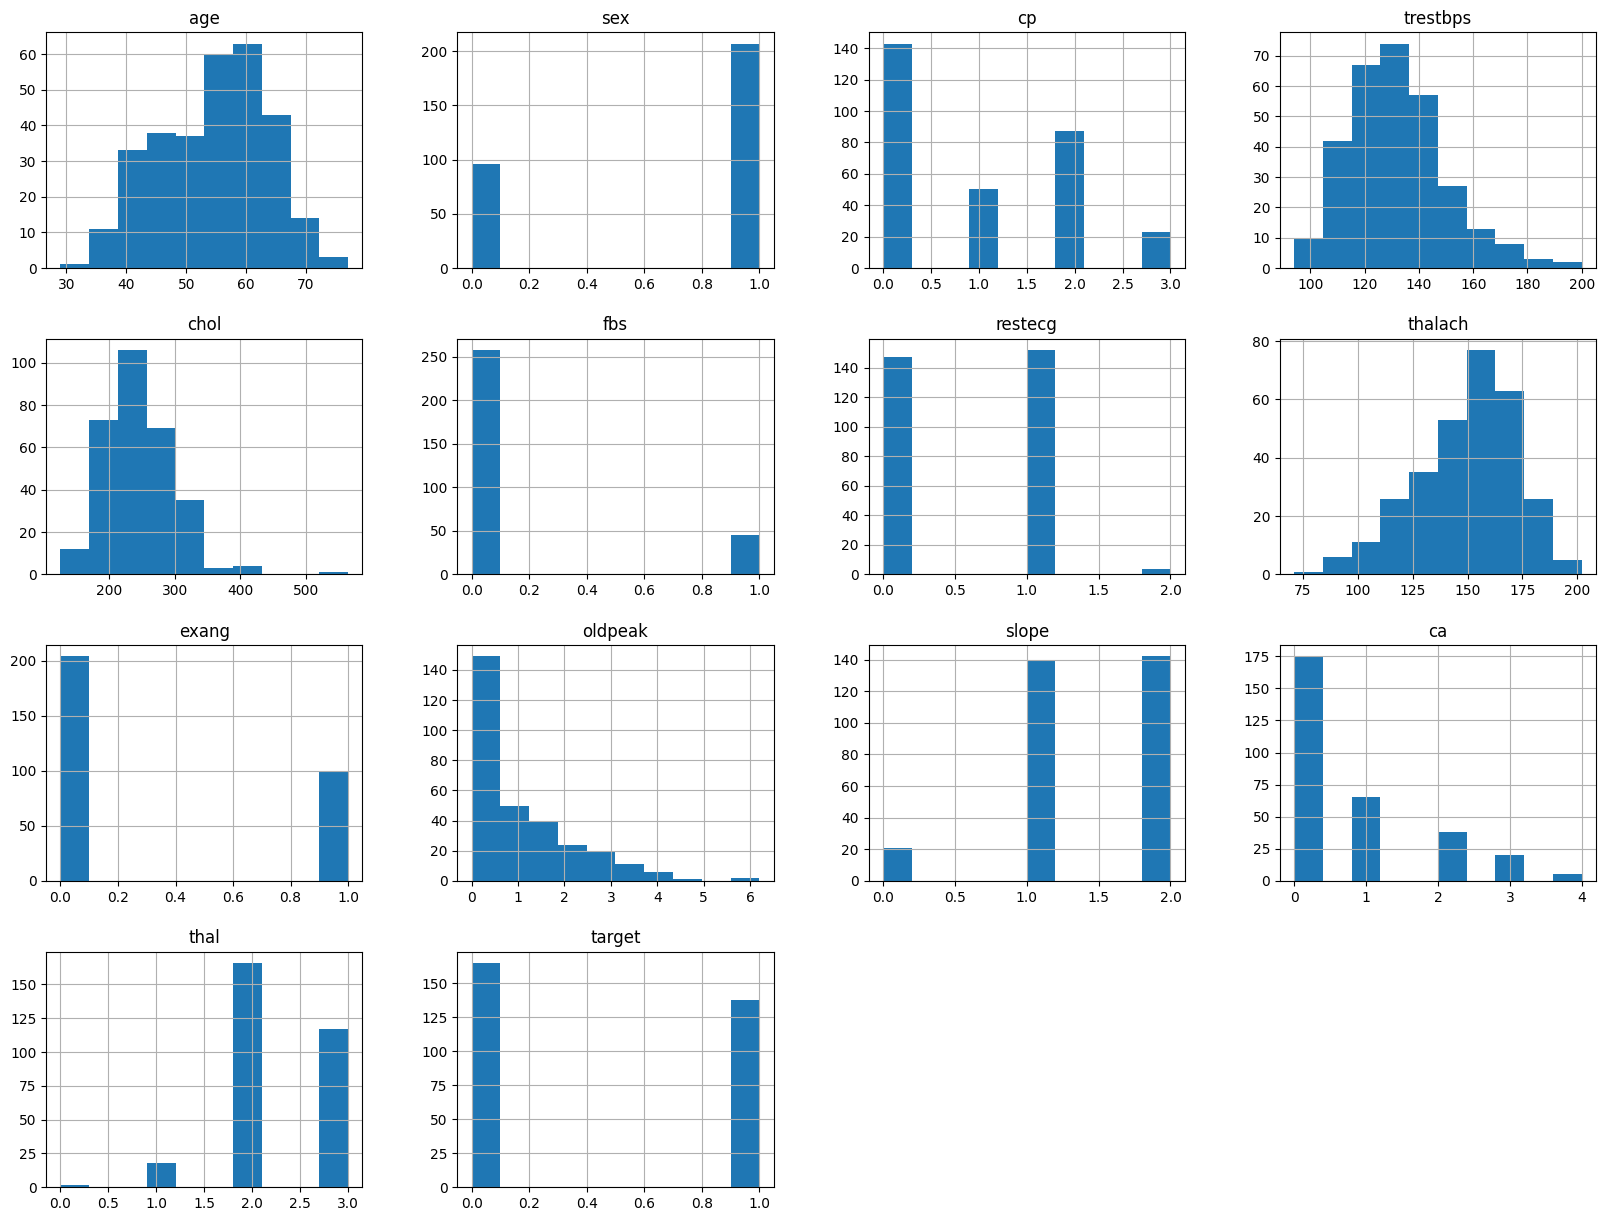

In [13]:
data2.hist(figsize = (20,15))
plt.show()

### [5 pts] 1.4 Looking at class balance

We also want to make sure we are dealing with a balanced dataset. In this case, we want to confirm whether or not we have an equitable number of  sick and healthy individuals to ensure that our classifier will have a sufficiently balanced dataset to adequately classify the two. *Plot a histogram specifically of the sick target, and conduct a count of the number of sick and healthy individuals and discuss the results*: 

<Axes: >

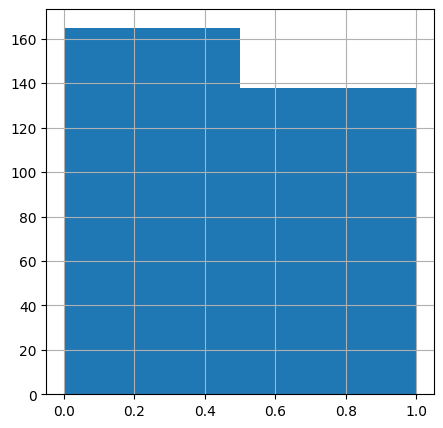

In [14]:
data2['target'].hist(bins=2, figsize=(5,5))

In [15]:
sick_counts = data2['target'].value_counts()
sick_counts

target
0    165
1    138
Name: count, dtype: int64

**Answer:** 
- sick population = 138; healthy population = 165
- Although the dataset is not perfectly balanced, it is relatively balanced. The difference in class sizes is not extreme, but there is a slight imbalance favoring the healthy population.

Balanced datasets are important to ensure that classifiers train adequately and don't overfit, however arbitrary balancing of a dataset might introduce its own issues. 

**Discuss some of the problems that might arise by artificially balancing a dataset.**
- Loss of Information: If we move data from the majority class, this can lead to a loss important data. 
- Overfitting: If we oversample the minority class by replicating data, this can lead to overfitting, especially when the number of minority class samples is very slow. 
- Introduction of Bias: Oversampling might make the model overly specific to the characteristics of the minority class, whereas undersampling might cause the model to overlook certain characteristics of the majority class that were not included in the reduced sample.

### [5 pts] 1.5 Looking at Data Correlation

Now that we have our dataframe prepared let's start analyzing our data. For this next question let's look at the correlations of our variables to our target value. First, use the heatmap function to plot the correlations of the data.

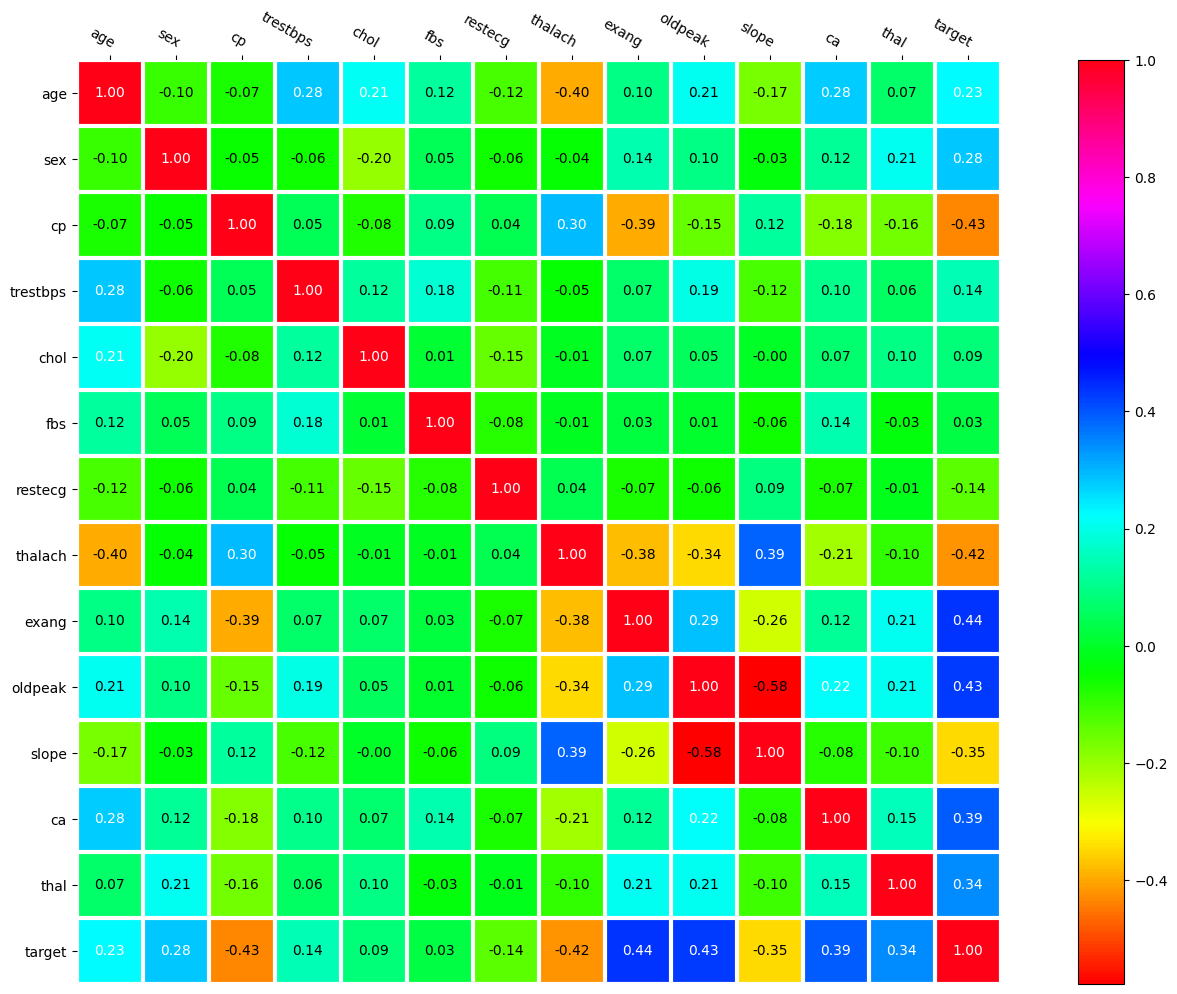

In [16]:
correlations = data2.corr()
columns = list(data2)
# Creates the heatmap
heatmap(correlations.values, columns, columns, figsize=(20, 12), cmap="hsv")

Next, show the correlation to the `target` feature only and sort them in descending order.

In [17]:
correlations["target"].sort_values(ascending=False)

target      1.000000
exang       0.436757
oldpeak     0.430696
ca          0.391724
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
chol        0.085239
fbs         0.028046
restecg    -0.137230
slope      -0.345877
thalach    -0.421741
cp         -0.433798
Name: target, dtype: float64

**From the heatmap values and the description of the features, why do you think some variables correlate more highly than others?**  (This question is just to get you thinking and there is no perfect answer since we have no medical background)

**Answer:**
- For the exanng, experiencing angina when exercise is a strong signal that the person may have a heart disease, so this is highly correlated to the sickness.
- oldpeak is also highly positive correlated to the heart disease, because this is a sign of poor blood flow during exercise.
- The more negative correlation between target and thalach suggests that lower maximum heart rates are associated with a higher likelihood of heart disease. This could be because individuals with heart disease may not be able to achieve high heart rates.
- The negative strong correlation between cp and target indicates that people with obvious symtoms start the treatment early which prevents the heart disease, but the popele without strong symtoms may not notice the problem and be diagnosed later. 

## [25 pts] Part 2. Prepare the Data and run a KNN Model

Before running our various learning methods, we need to do some additional prep to finalize our data. Specifically you'll have to cut the classification target from the data that will be used to classify, and then you'll have to divide the dataset into training and testing cohorts.

Specifically, we're going to ask you to prepare 2 batches of data. The first batch will simply be the raw numeric data that hasn't gone through any additional pre-processing. The second batch will be data that you will pipeline using pre-processing methods. We will then feed both of these datasets into a classifier to showcase just how important this step can be!

### [2 pts] 2.1 Separate target labels from data

Save the label column as a separate array and then make a new dataframe without the target.

In [10]:
y = data["target"]
x = data2.drop(["target"],axis = 1)

### [5 pts] 2.2 Balanced Train Test Split

Now, create your 'Raw' unprocessed training data by dividing your dataframe into training and testing cohorts, with your training cohort consisting of 60% of your total dataframe. To ensure that the train and test sets have balanced classes, use the [stratify command of train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Output the resulting shapes of your training and testing samples to confirm that your split was successful. Additionally, output the class counts for the training and testing cohorts to confirm that there is no artifical class imbalance.

Note: Use `randomstate = 0` to ensure that the same train/test split happens everytime for ease of grading.

In [11]:
train_raw, test_raw, target, target_test = train_test_split(x,y, test_size=0.4, stratify= y, random_state=0)

target
0    99
1    82
Name: count, dtype: int64

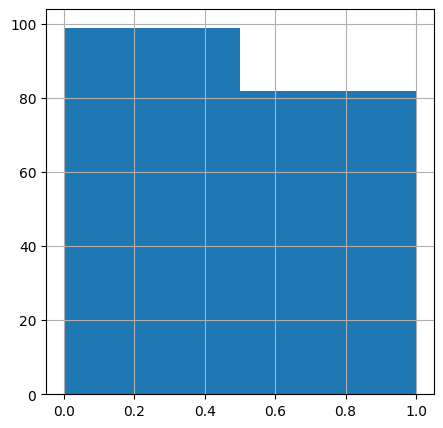

In [20]:
# Training set
target.hist(bins=2, figsize=(5,5))
target.value_counts()

target
0    66
1    56
Name: count, dtype: int64

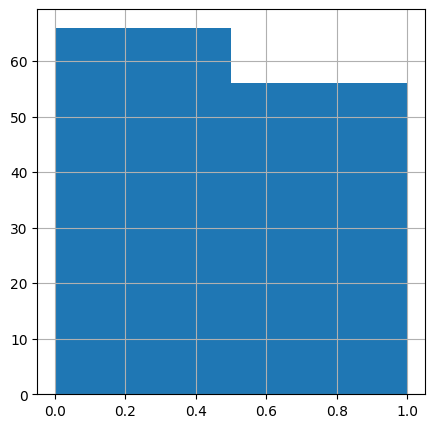

In [21]:
#Testing classes
target_test.hist(bins=2, figsize=(5,5))
target_test.value_counts()

In [1]:
print('Original data target 0 proportion=',165/(165+138))
print('Training set target 0 proportion=',99/(99+82))
print('Test set target 0 proportion=',66/(66+56),'\n')
print('Training set proportion = ', (99+82)/(66+56+99+82))

Original data target 0 proportion= 0.5445544554455446
Training set target 0 proportion= 0.5469613259668509
Test set target 0 proportion= 0.5409836065573771 

Training set proportion =  0.5973597359735974


Therefore, no artificial class imbalance, and the split is successful. 

### [5 pts] 2.3 KNN on raw data 

Now, let's try a classification model on this data. We'll first use KNN since it is the one we are most familiar with. 

One thing we noted in class was that because KNN relies on Euclidean distance, it is highly sensitive to the relative magnitude of different features. Let's see that in action! Implement a K-Nearest Neighbor algorithm on our data and report the results. For this initial implementation, simply use the default settings. Refer to the [KNN Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for details on implementation. **Report on the test accuracy of the resulting model and plot the confusion matrix.**

Recall that accurracy can be calculated easily using `metrics.accuracy_score` and that we have a helper function to draw the confusion matrix.

In [16]:
knn = KNeighborsClassifier()
knn.fit(train_raw, target)
predicted = knn.predict(test_raw)

In [18]:
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(target_test,predicted)))

Accuracy:    0.655738


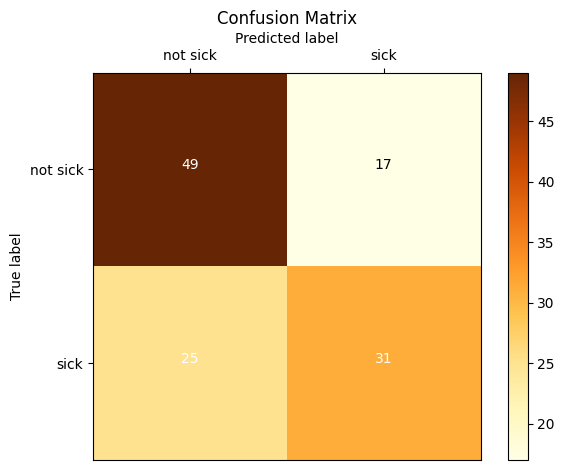

In [19]:
draw_confusion_matrix(target_test, predicted, ['not sick', 'sick'])

### [5 pts] 2.4 KNN on preprocessed data
Now lets implement a pipeline to preprocess the data. For the pipeline, use `StandardScaler` on the numerical features and one-hot encoding on the categorical features. For reference on how to make a pipeline, please look at project 1.

For reference, the categorical features are `['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca','thal']`.

In [20]:
pipeline = ColumnTransformer(
    [
        ("num", StandardScaler(), ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']),
        ("cat", OneHotEncoder(), ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']),
    ]
)

**Now use the pipeline to transform the data and then apply the same KNN classifier with this new training/testing data. Report the test accuraccy. Discuss the implications of the different results you are obtaining.**

Note: Remember to use `fit_transform` on the training data and `transform` on the testing data.

In [21]:
train = pipeline.fit_transform(train_raw)
test = pipeline.transform(test_raw)

In [22]:
knn.fit(train, target)
predicted_t = knn.predict(test)
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(target_test,predicted_t)))

Accuracy:    0.754098


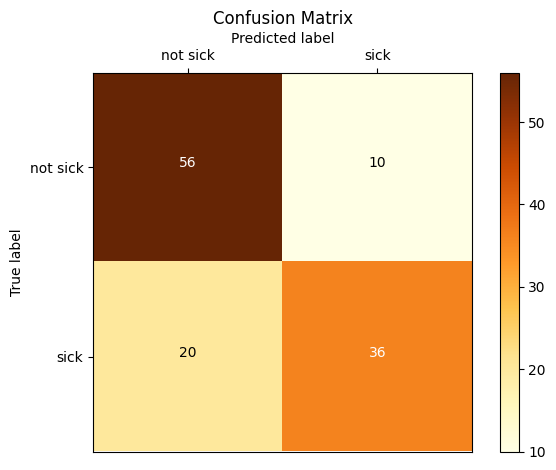

In [23]:
draw_confusion_matrix(target_test, predicted_t, ['not sick', 'sick'])

**Answer:** 
- The accuracy increased from 0.655738 to 0.754098.
- StandardScaler() standardizes these features to have a mean of zero and a standard deviation of one. This process prevents the features with high distance to dominate and make sure that each features contributes equally to distance calculations.
-  OneHotEncoder() transforms these into binary columns, ensuring that the model doesn't erroneously interpret numerical proximity as a relationship.

### [8 pts] 2.5 KNN Parameter optimization for `n_neighbors`

The KNN Algorithm includes an `n_neighbors` attribute that specifies how many neighbors to use when developing the cluster. (The default value is 5, which is what your previous model used.) **Let's now try n values of: 1, 2, 4, 8, 16, 32, 64. Run your model for each value and report the test accuracy for each**.

In [24]:
n_values=[1, 2, 4, 8, 16, 32, 64]
accuracy = []

for n in n_values: 
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(train, target)
    predicted_tn = knn.predict(test)
    accuracy.append((n,metrics.accuracy_score(target_test, predicted_tn)))
    print("%-12s %f" % (f'Accuracy of {n} neighbors:', metrics.accuracy_score(target_test, predicted_tn)))

Accuracy of 1 neighbors: 0.770492
Accuracy of 2 neighbors: 0.745902
Accuracy of 4 neighbors: 0.754098
Accuracy of 8 neighbors: 0.762295
Accuracy of 16 neighbors: 0.770492
Accuracy of 32 neighbors: 0.778689
Accuracy of 64 neighbors: 0.778689


In [47]:
accuracy.sort(key=lambda x: x[1])
accuracy

[(2, 0.7459016393442623),
 (4, 0.7540983606557377),
 (8, 0.7622950819672131),
 (1, 0.7704918032786885),
 (16, 0.7704918032786885),
 (32, 0.7786885245901639),
 (64, 0.7786885245901639)]

**Comment for which value of n did the KNN model perform the best.  Did the model perform strictly better or stricly worse as the value of n increased?**

**Answer:**
As the number of neighbors n increased from 2 to 64, there is a general trend of improvement in accuracy initially, but this trend plateaus and the accuracy stabilizes at 0.7786885245901639 for n = 32 and n = 64.

So we have a model that seems to work well. But let's see if we can do better! To do so we'll employ Logistic Regression and SVM to improve upon the model and compare the results.

**For the rest of the project, you will only be using the transformed data and not the raw data. DO NOT USE THE RAW DATA ANYMORE**

## [20 pts] Part 3. Additional Learning Methods:  Logistic Regression

Let's now try Logistic Regression. Recall that Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.

### [5 pts] 3.1 Run the default Logistic Regression

Implement a Logistical Regression Classifier. Review the [Logistical Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for how to implement the model.  Use the default settings. **Report on the test accuracy and plot the confusion matrix.**

In [107]:
log_reg = LogisticRegression()
log_reg.fit(train, target)
predicted_lr = log_reg.predict(test)

print("%-12s %f" % ("Accuracy:", metrics.accuracy_score(target_test, predicted_lr)))

Accuracy:    0.819672


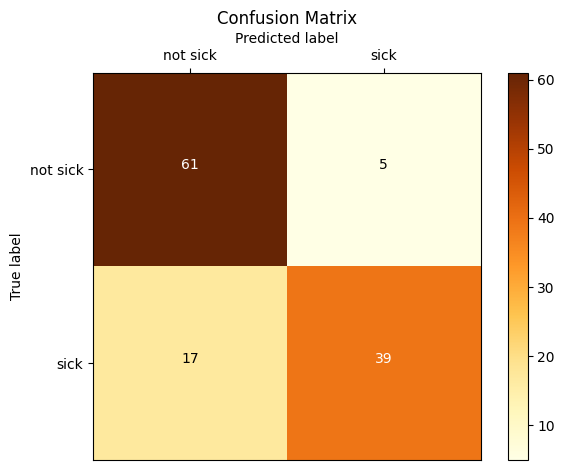

In [108]:
draw_confusion_matrix(target_test, predicted_lr, ['not sick', 'sick'])

### [5 pts] 3.2 Compare Logistic Regression and  KNN
In your own words, describe the key differences between Logistic Regression and KNN? When would you use one over the other?

**Answer:**
- KNN is non-parametric. It operates on the principle that similar data points are near each other. It doesn't learn a model. Logistic Regression is a parametric, linear model that uses a logistic function. It estimates parameters from the training data.
- Decision Boundary: KNN can produce more flexible decision boundaries. Logistic Regression assumes a linear decision boundary. It is more robust to noise in the training data compared to a low-K KNN model.
- KNN requires feature scaling as it relies on the distances between data points. Logistic Regression also benefits from feature scaling, but it is not as sensitive as KNN to the feature scales.

- Use Logistic Regression when interpretability is important, and the relationship between features and the target is approximately linear.
- Use KNN when the dataset is small to medium-sized, as KNN can slow down with very large datasets, the decision boundary is highly non-linear.

### [5 pts] 3.3 Tweaking the Logistic Regression

**What are some parameters we can change that will affect the performance of Logistic Regression?**

**Answer:**
- C in scikit-learn, smaller values specify stronger regularization. Regularization is used to avoid overfitting by penalizing large coefficients.
- Solver: Different algorithms can be used to optimize the logistic regression function. The choice of solver can affect the speed and accuracy of convergence.
- Class Weight: Useful in dealing with unbalanced datasets. It allows you to specify a higher penalty for misclassifying minority class instances, helping to balance the influence of each class on the model.
- Convergence Criteria: The maximum number of iterations taken for the solvers to converge. Tolerance for stopping criteria. A smaller tol will lead to more precise solutions but might increase the computational load.

**Implement Logistic Regression with the following specifications, Report the test accuracy and plot the confusion matrix**
- Use `saga` solver (Stochastic Average Gradient Accelerated Method)
- L2 penalty (ridge regularization)
- Max iteration = 1000
- `C` = 1 (inverse of regularization strength)

Accuracy:    0.819672


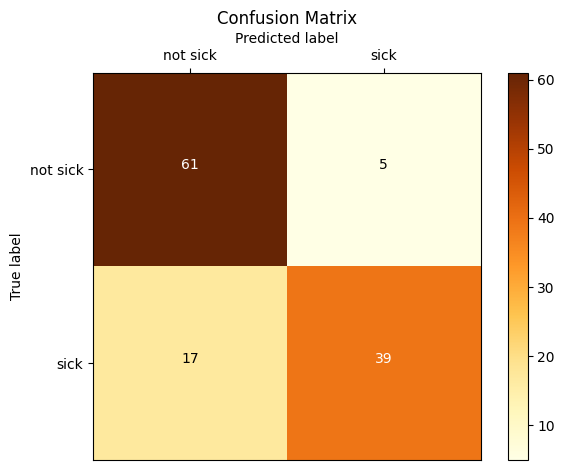

In [110]:
log_reg = LogisticRegression(penalty="l2", max_iter=1000, solver="saga", C=1)
log_reg.fit(train, target)
predicted_lr = log_reg.predict(test)
print("%-12s %f" % ("Accuracy:", metrics.accuracy_score(target_test, predicted_lr)))
draw_confusion_matrix(target_test, predicted_lr, ['not sick', 'sick'])

**Now, Implement the same regression with `c=0.001`. Report on the test accuracy and plot the confusion matrix.**

Accuracy:    0.565574


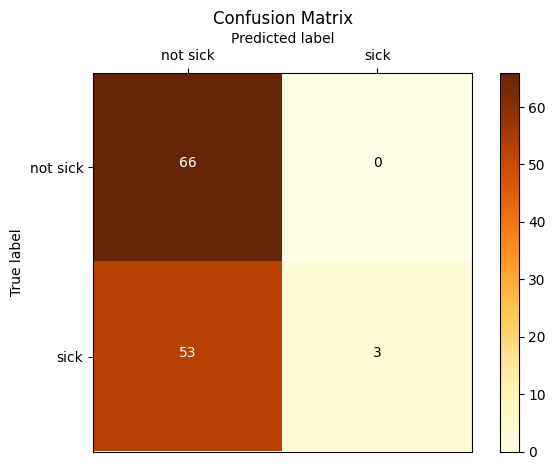

In [111]:
log_reg = LogisticRegression(penalty="l2", max_iter=1000, solver="saga", C=0.001)
log_reg.fit(train, target)
predicted_lr = log_reg.predict(test)
print("%-12s %f" % ("Accuracy:", metrics.accuracy_score(target_test, predicted_lr)))
draw_confusion_matrix(target_test, predicted_lr, ['not sick', 'sick'])

**Did the accuraccy drop or improve? Why?**

**Answer:**
The acurracy drops when C changed from 1 to 0.001, which means that we have a stronger regulation in the second case. The regularization is too strong that it leads to an underfitting, making parameters very small and model too simple to capture the some important patters of the features. We can see it in the second confusion matrix that the model predicts almost all cases as 'sick', with almost no true negatives or false positives. This suggests a bias towards predicting the majority class or a failure to distinguish effectively between the classes due to overly strong regularization.

### [5 pts] 3.4 Trying out different penalties

**Now, implement Logistic Regression with the following specifications, Report the test accuracy and plot the confusion matrix**
- Use `saga` solver (Stochastic Average Gradient Accelerated Method)
- L1 penalty (LASSO regularization)
- Max iteration = 1000
- `C` = 1 (inverse of regularization strength)

Accuracy:    0.827869


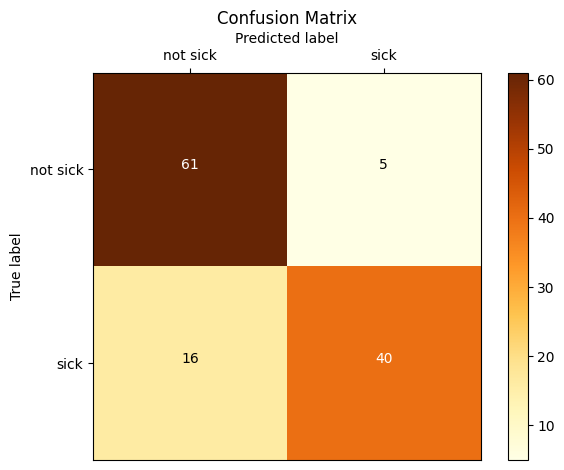

In [112]:
log_reg = LogisticRegression(penalty="l1", max_iter=1000, solver="saga", C=1)
log_reg.fit(train, target)
predicted_lr = log_reg.predict(test)
print("%-12s %f" % ("Accuracy:", metrics.accuracy_score(target_test, predicted_lr)))
draw_confusion_matrix(target_test, predicted_lr, ['not sick', 'sick'])

**Describe what the purpose of a penalty term is and how the change from L2 to L1 affected the model.**

**Answer:**
The penalty term indicates what type of regularization we want to use in this model. Regularization penalizes large values parameters and prevents overfitting. Changing from L2 to L1 regularization representing a change from ridge to LASSO regularization, which leads to an increasing of accuracy. LASSO regularization let the parameters of unimportant features equals to 0, so we only focus on training the parameters of highly correlated features, which improves the performance of the model. From the confusion model, we can see that the false positive decreases and true negative increases. 

## [20 pts] Part 4. Additional Learning Methods:  SVM (Support Vector Machine)

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimensional space this hyperplane is a line dividing a plane in two parts each corresponding to one of the two classes.

Recall that `scikit-learn` uses *soft-margin SVM* to account for datasets that are not separable. 

### [5 pts] 4.1 Run default SVM classifier

Implement a Support Vector Machine classifier on your pipelined data. Review the [SVM Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) for how to implement a model. For this implementation you can simply use the default settings. **Report on the test accuracy and plot the confusion matrix.**

Accuracy:    0.803279


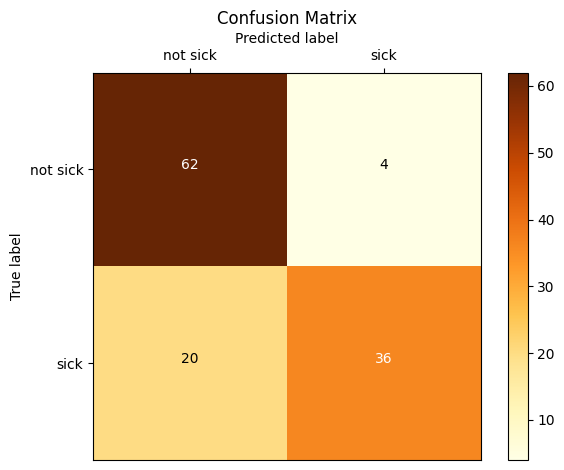

In [113]:
svm = SVC()
svm.fit(train, target)
predicted_svm = svm.predict(test)
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(target_test,predicted_svm)))
draw_confusion_matrix(target_test, predicted_svm, ['not sick', 'sick'])

**Print out the number of support vectors that SVC has determined. Look at the documentation for how to get this.**

In [68]:
num_support_vectors = len(svm.support_vectors_)
num_support_vectors

106

You may find that there are quite a few support vectors. This is due in part to the small number of samples in the training set and the choice of kernel.

### [5 pts] 4.2 Use a Linear SVM

`SVC` defaults to use Gaussian kernel. **Now rerun your SVM, but now use linear kernel. Report on the test accuracy and plot the confusion matrix. Also, print out the number of support vectors.**

Accuracy:    0.844262
number of support vectors =  65


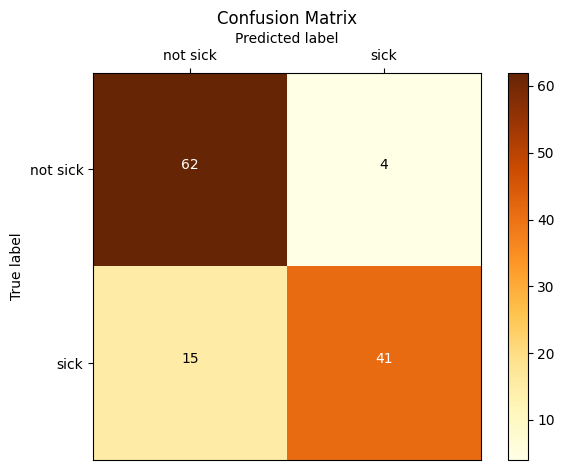

In [114]:
svm = SVC(kernel='linear')
svm.fit(train, target)
predicted_svm = svm.predict(test)
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(target_test,predicted_svm)))
print('number of support vectors = ',len(svm.support_vectors_))
draw_confusion_matrix(target_test, predicted_svm, ['not sick', 'sick'])

You will notice that number of support vectors has decreased significantly. 

### [5 pts] 4.3 Compare Gaussian kernel and Linear kernel

Explain what the new results you've achieved mean. Read the documentation to understand what you've changed about your model and explain why changing that input parameter might impact the results in the manner you've observed.

**Answer:**
Changing from gaussian kernel to linear kernel results to an increase of accuracy, lower false positive, and higher true negative. This change suggests that for your particular dataset, the underlying relationship between the features and the target variable might be linear enough that the additional complexity of the RBF kernel is unnecessary. 

### [5 pts] 4.4 Compare SVM and Logistic Regression

Both logistic regression and linear SVM are trying to classify data points using a linear decision boundary but achieve it in different ways. In your own words, explain the difference between the ways that Logistic Regression and Linear SVM find the boundary?

**Answer:**
- Optimization Criterion:
Logistic Regression: Seeks coefficients that best explain the data in a probabilistic sense, aiming for good probabilistic estimates of class membership.
Linear SVM: Seeks the line (or hyperplane in higher dimensions) that separates the classes with the maximum margin, focusing purely on the geometrical positioning of the data.
- Sensitivity to Data Points:
Logistic Regression: Every data point affects the placement of the decision boundary.
Linear SVM: Only support vectors influence the placement of the boundary.
- Robustness:
Logistic Regression: Less robust to outliers as compared to SVM since the logistic loss increases logarithmically with distance from the decision boundary.
Linear SVM: More robust to outliers, especially because the hinge loss does not penalize points that are classified correctly and are outside the margin.

## [10 pts] Part 5: Cross Validation and Model Selection

You've sampled a number of different classification techniques and have seen their performance on the dataset. 
Before we draw any conclusions on which model is best, we want to ensure that our results are not the result of the random sampling of our data we did with the Train-Test-Split. To ensure otherwise we will conduct a K-Fold Cross-Validation with GridSearch to determine which model perform best and assess its performance on the test set.

### [10 pts]  Model Selection

Run a `GridSearchCV` with 3-Fold Cross Validation. You will be running each classification model with different parameters. 

KNN:
- `n_neighbors = [1,3,5,7]`
- `metric = ["euclidean","manhattan"] #Different Distance functions`

Logistic Regression:
- `penalty = ["l1","l2"]`
- `solver = ["liblinear","saga"]`
- `C = [0.001,0.1,10]`

SVM:
- `kernel = ["linear","rbf"]`
- `C = [0.001,0.1,10]`


Make sure to train and test your model on the transformed data and not on the raw data.

*Note: You may have to increase the number of iterations for convergence for some of the models.*

After using `GridSearchCV`, put the results into a `pandas Dataframe` and print out the whole table.

In [119]:
k = 3
kf = KFold(n_splits=k, random_state=None)

# KNN
knn_params = {
    'n_neighbors': [1, 3, 5, 7],
    'metric': ['euclidean', 'manhattan']
}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=kf, scoring='accuracy')

# Logistic Regression
log_reg_params = {
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'C': [0.001, 0.1, 10]
}
log_reg_grid = GridSearchCV(LogisticRegression(max_iter=10000), log_reg_params, cv=kf, scoring='accuracy')

# SVM
svm_params = {
    'kernel': ['linear', 'rbf'],
    'C': [0.001, 0.1, 10]
}
svm_grid = GridSearchCV(SVC(), svm_params, cv=kf, scoring='accuracy')

# Fit the grids
knn_grid.fit(train, target)
log_reg_grid.fit(train, target)
svm_grid.fit(train, target)

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'C': [0.001, 0.1, 10], 'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [120]:
def get_results_df(grid_search, model_name):
    results_df = pd.DataFrame(grid_search.cv_results_)
    results_df['Model'] = model_name

    cols = ['Model'] + [col for col in results_df.columns if col != 'Model']
    results_df = results_df[cols]
    return results_df

all_results = pd.concat([
    get_results_df(knn_grid, "KNN"),
    get_results_df(log_reg_grid, "Logistic Regression"),
    get_results_df(svm_grid, "SVM")
])

all_results_sorted = all_results.sort_values(by='mean_test_score', ascending=False)

all_results_sorted

,Model,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,param_C,param_penalty,param_solver,param_kernel
2,SVM,0.000792,0.000013,0.000515,0.000013,NaN,NaN,"{'C': 0.1, 'kernel': 'linear'}",0.836066,0.850000,0.900000,0.862022,0.027451,1,0.1,NaN,NaN,linear
6,Logistic Regression,0.000725,0.000016,0.000388,0.000009,NaN,NaN,"{'C': 0.1, 'penalty': 'l2', 'solver': 'libline...",0.803279,0.833333,0.933333,0.856648,0.055595,1,0.1,l2,liblinear,NaN
7,Logistic Regression,0.001592,0.000426,0.000383,0.000006,NaN,NaN,"{'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}",0.803279,0.833333,0.933333,0.856648,0.055595,1,0.1,l2,saga,NaN
4,SVM,0.005168,0.003835,0.000474,0.000005,NaN,NaN,"{'C': 10, 'kernel': 'linear'}",0.770492,0.833333,0.900000,0.834608,0.052879,2,10,NaN,NaN,linear
2,KNN,0.000543,0.000033,0.003790,0.000187,euclidean,5,"{'metric': 'euclidean', 'n_neighbors': 5}",0.770492,0.833333,0.883333,0.829053,0.046167,1,NaN,NaN,NaN,NaN
6,KNN,0.000360,0.000002,0.000803,0.000014,manhattan,5,"{'metric': 'manhattan', 'n_neighbors': 5}",0.786885,0.833333,0.866667,0.828962,0.032717,2,NaN,NaN,NaN,NaN
5,KNN,0.000364,0.000002,0.000794,0.000013,manhattan,3,"{'metric': 'manhattan', 'n_neighbors': 3}",0.803279,0.800000,0.883333,0.828871,0.038534,3,NaN,NaN,NaN,NaN
1,KNN,0.000622,0.000030,0.004334,0.000197,euclidean,3,"{'metric': 'euclidean', 'n_neighbors': 3}",0.803279,0.783333,0.900000,0.828871,0.050951,3,NaN,NaN,NaN,NaN
7,KNN,0.000358,0.000001,0.000834,0.000019,manhattan,7,"{'metric': 'manhattan', 'n_neighbors': 7}",0.770492,0.833333,0.866667,0.823497,0.039874,5,NaN,NaN,NaN,NaN
8,Logistic Regression,0.001043,0.000263,0.000375,0.000001,NaN,NaN,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}",0.786885,0.800000,0.866667,0.817851,0.034931,3,10,l1,liblinear,NaN


**What was the best model and what was it's score?**

In [121]:
best_model_row = all_results_sorted.iloc[0]
best_model_row

Model                                           SVM
mean_fit_time                              0.000792
std_fit_time                               0.000013
mean_score_time                            0.000515
std_score_time                             0.000013
param_metric                                    NaN
param_n_neighbors                               NaN
params               {'C': 0.1, 'kernel': 'linear'}
split0_test_score                          0.836066
split1_test_score                              0.85
split2_test_score                               0.9
mean_test_score                            0.862022
std_test_score                             0.027451
rank_test_score                                   1
param_C                                         0.1
param_penalty                                   NaN
param_solver                                    NaN
param_kernel                                 linear
Name: 2, dtype: object

In [122]:
print('The best model is', best_model_row['Model'],
      'with parameters of ',best_model_row['params'],
      'and mean_test_score of ', best_model_row['mean_test_score'])

The best model is SVM with parameters of  {'C': 0.1, 'kernel': 'linear'} and mean_test_score of  0.8620218579234972


**Using the best model you have, report the test accuracy and plot the confusion matrix**

Accuracy:    0.811475


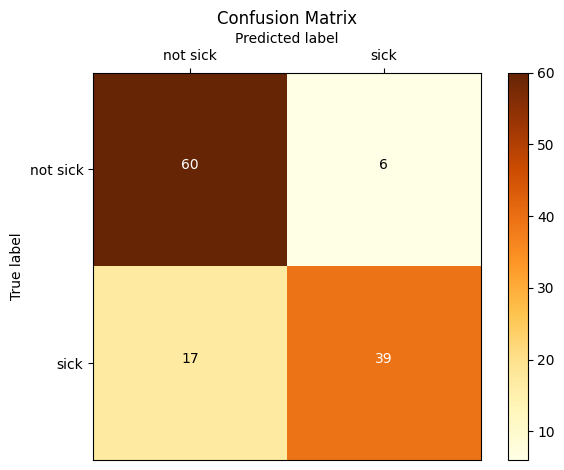

In [123]:
predicted_cv = svm_grid.predict(test)
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(target_test,predicted_cv)))
draw_confusion_matrix(target_test, predicted_cv, ['not sick', 'sick'])